# Data Cleaning

In this step, we clean the dataset by:

- Checking missing values
- Fixing data types
- Handling outliers
- Removing duplicates
- Preparing data for analysis


# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data Set

In [5]:
df = pd.read_csv(r'C:\Users\bhask\Data_Analytics_Projects\loan_data.csv')

In [9]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
df.shape


(45000, 14)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [12]:
df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# Checking Missing Values

We identify columns with missing data to decide how to handle them.


In [13]:
df.isnull().sum()


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# Handle Missing Values

 Numeric → Median
 
 Categorical → Mode

# Check Duplicates

In [15]:
df.duplicated().sum()


np.int64(0)

In [16]:
df.drop_duplicates(inplace=True)


# Fixing Data Types

Ensuring numeric columns are correctly stored as numbers.


In [17]:
df.dtypes


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

# Outlier Detection

We use boxplots to identify extreme values in numerical columns.


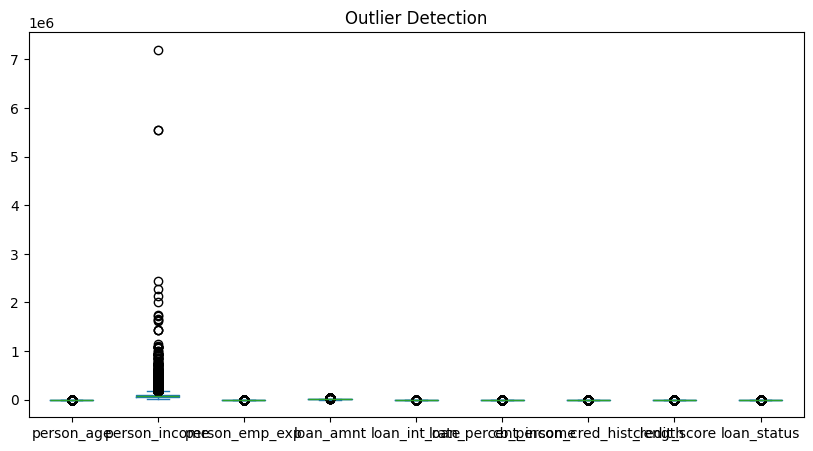

In [18]:
import matplotlib.pyplot as plt

df.select_dtypes(include="number").plot(kind="box", figsize=(10,5))
plt.title("Outlier Detection")
plt.show()


# Encoding Categorical Variables

We convert categorical data into numeric format for analysis or modeling.


In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


# Loan Status Distribution

This bar chart shows the number of approved and rejected loans.
It helps understand the class balance in the dataset.

If one category is significantly higher,
it indicates imbalance which may affect model performance.


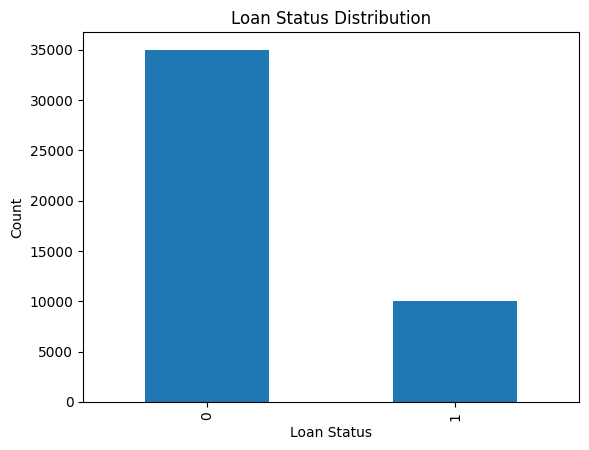

In [20]:
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


# Gender Distribution

This chart shows the distribution of applicants by gender.
It helps understand demographic representation in the dataset.


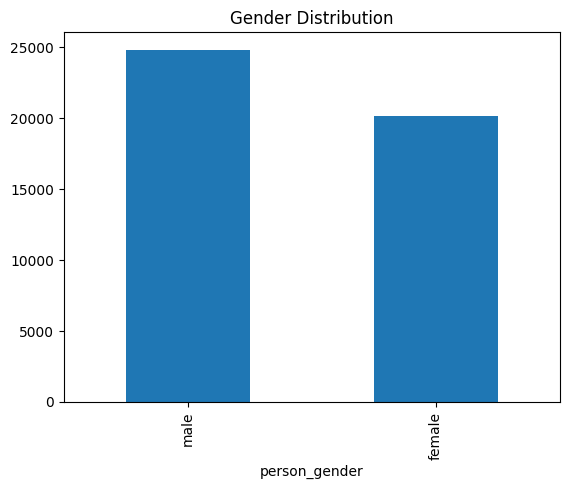

In [21]:
df["person_gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()


# Loan Intent Distribution

This pie chart shows the proportion of different loan purposes,
such as education, personal, or medical.

It helps identify the most common reasons for taking loans.


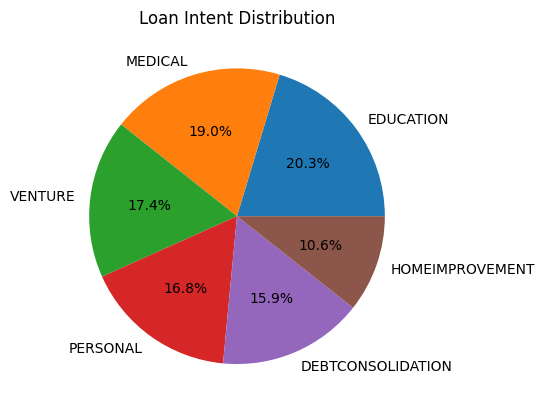

In [22]:
df["loan_intent"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Loan Intent Distribution")
plt.ylabel("")
plt.show()


# Income Distribution

This histogram shows how applicant incomes are distributed.
It helps identify income ranges where most applicants fall.


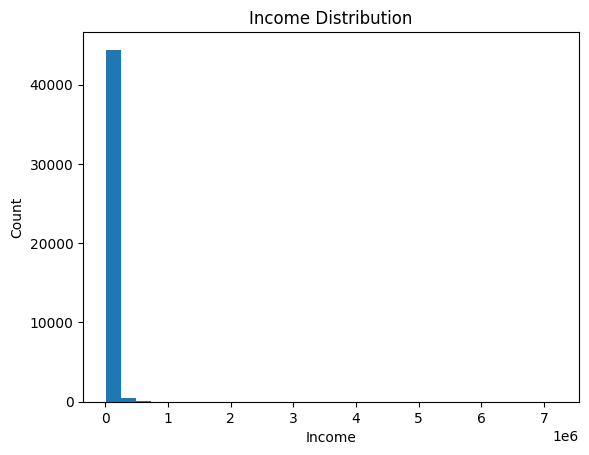

In [23]:
plt.hist(df["person_income"], bins=30)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


# Credit Score Distribution

This histogram visualizes the spread of credit scores,
helping understand the financial reliability of applicants.


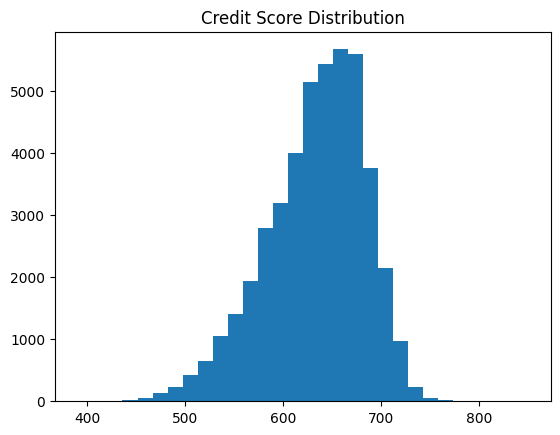

In [24]:
plt.hist(df["credit_score"], bins=30)
plt.title("Credit Score Distribution")
plt.show()


# Loan Amount vs Income

This scatter plot shows the relationship between applicant income
and requested loan amount.

It helps determine whether higher income applicants request larger loans.


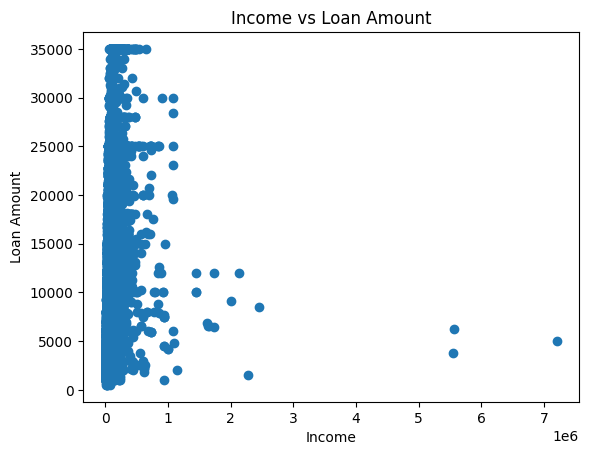

In [25]:
plt.scatter(df["person_income"], df["loan_amnt"])
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Income vs Loan Amount")
plt.show()


# Credit Score vs Loan Status

This analysis compares credit scores across approved and rejected loans.
It helps understand whether higher credit scores increase approval chances.


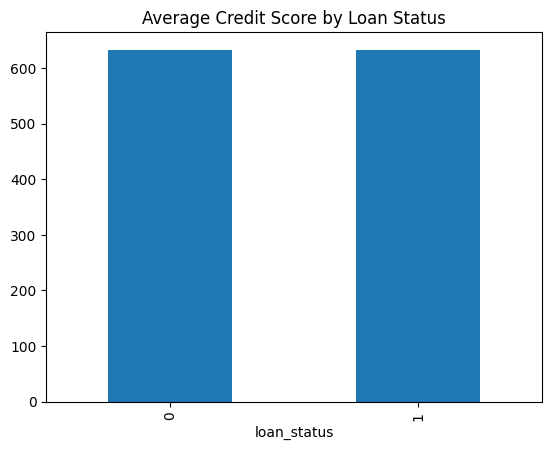

In [26]:
df.groupby("loan_status")["credit_score"].mean().plot(kind="bar")
plt.title("Average Credit Score by Loan Status")
plt.show()


# Interest Rate Distribution

This histogram shows how loan interest rates vary across applicants.
It helps identify the common interest rate range.


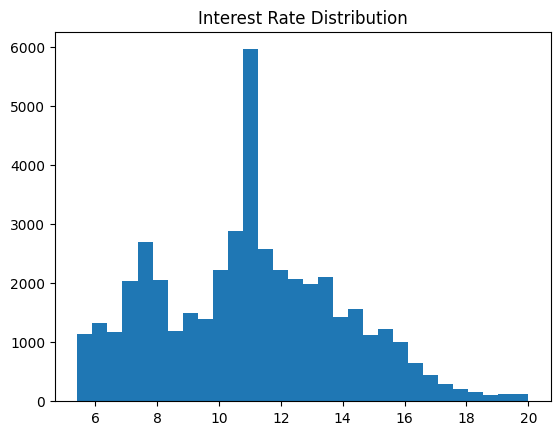

In [27]:
plt.hist(df["loan_int_rate"], bins=30)
plt.title("Interest Rate Distribution")
plt.show()


# Correlation Heatmap

This heatmap shows relationships between numerical variables,
helping identify which features are related.


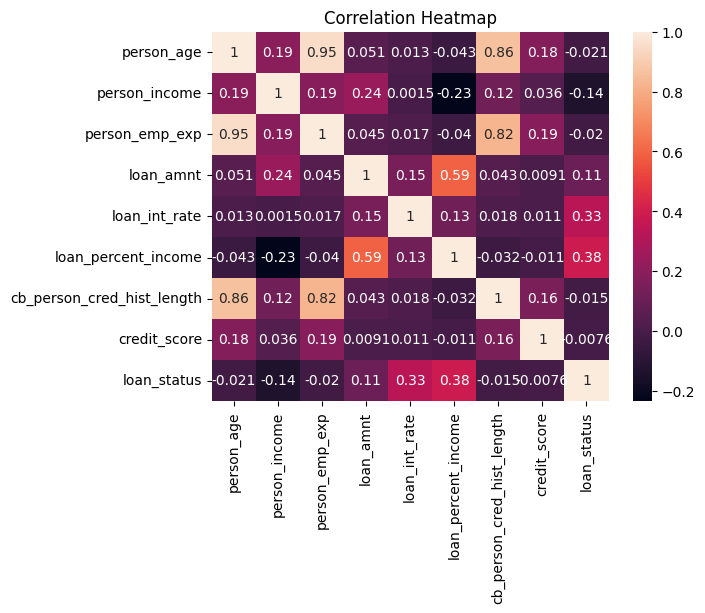

In [28]:
import seaborn as sns

numeric_df = df.select_dtypes(include="number")

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


# Average Income by Loan Status

This analysis compares the average income of applicants whose loans
were approved versus rejected.

It helps determine whether income plays a significant role in approval decisions.


In [29]:
df.groupby("loan_status")["person_income"].mean()


loan_status
0    86157.040743
1    59886.096900
Name: person_income, dtype: float64

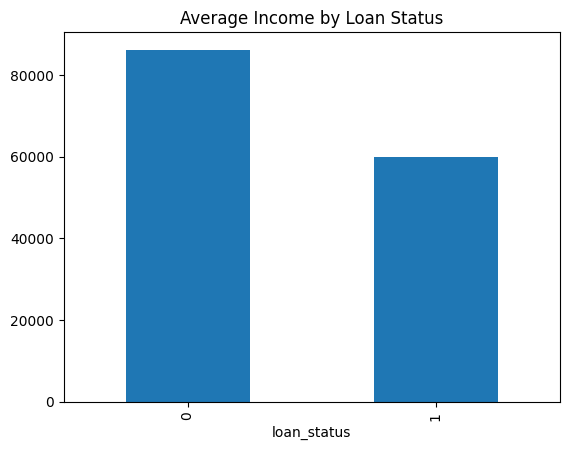

In [30]:
df.groupby("loan_status")["person_income"].mean().plot(kind="bar")
plt.title("Average Income by Loan Status")
plt.show()


# Loan Amount by Loan Purpose

This analysis shows which loan purposes typically involve higher loan amounts.


In [31]:
df.groupby("loan_intent")["loan_amnt"].mean().sort_values(ascending=False)


loan_intent
HOMEIMPROVEMENT      10419.187330
VENTURE               9658.897429
PERSONAL              9603.918432
DEBTCONSOLIDATION     9548.333660
EDUCATION             9507.405987
MEDICAL               9137.959172
Name: loan_amnt, dtype: float64

# Average Income by Loan Status

This analysis compares the average income of applicants whose loans
were approved versus rejected.

It helps determine whether income plays a significant role in approval decisions.


In [32]:
df.groupby("loan_status")["person_income"].mean()


loan_status
0    86157.040743
1    59886.096900
Name: person_income, dtype: float64

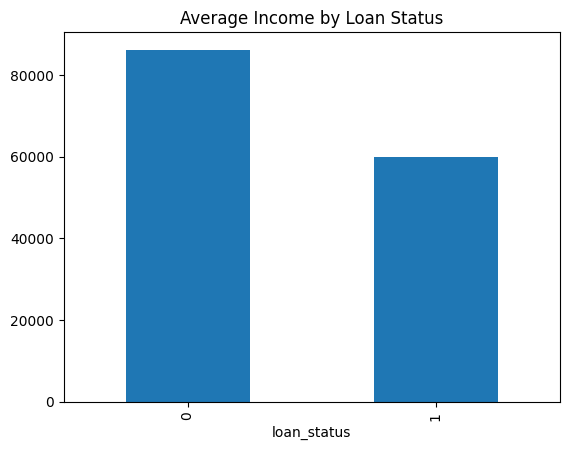

In [33]:
df.groupby("loan_status")["person_income"].mean().plot(kind="bar")
plt.title("Average Income by Loan Status")
plt.show()


# Previous Loan Defaults Impact

This analysis examines whether applicants with past defaults
are more likely to have their loans rejected.


In [34]:
pd.crosstab(df["previous_loan_defaults_on_file"], df["loan_status"])


loan_status,0,1
previous_loan_defaults_on_file,,
No,12142,10000
Yes,22858,0


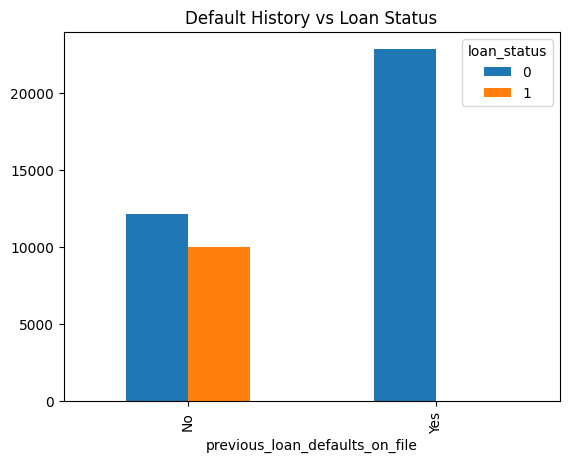

In [35]:
pd.crosstab(df["previous_loan_defaults_on_file"], df["loan_status"]).plot(kind="bar")
plt.title("Default History vs Loan Status")
plt.show()


# Education Level vs Loan Approval

This analysis shows whether education level influences loan approval rates.


In [36]:
pd.crosstab(df["person_education"], df["loan_status"])


loan_status,0,1
person_education,,
Associate,9378,2650
Bachelor,10381,3018
Doctorate,479,142
High School,9301,2671
Master,5461,1519


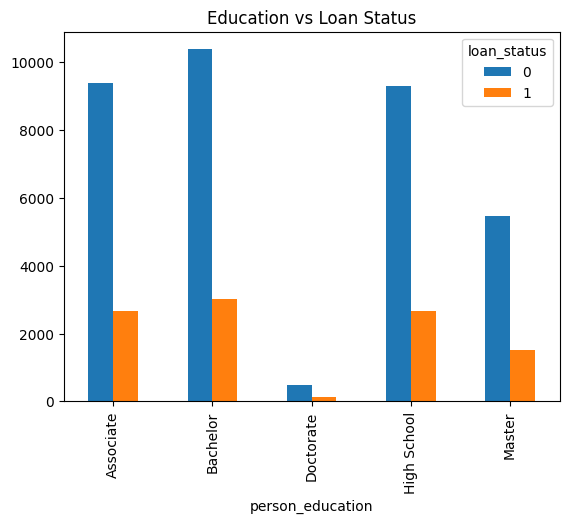

In [37]:
pd.crosstab(df["person_education"], df["loan_status"]).plot(kind="bar")
plt.title("Education vs Loan Status")
plt.show()


# Home Ownership vs Loan Approval

This analysis shows whether owning a home affects loan approval probability.


In [38]:
pd.crosstab(df["person_home_ownership"], df["loan_status"])


loan_status,0,1
person_home_ownership,,
MORTGAGE,16345,2144
OTHER,78,39
OWN,2729,222
RENT,15848,7595


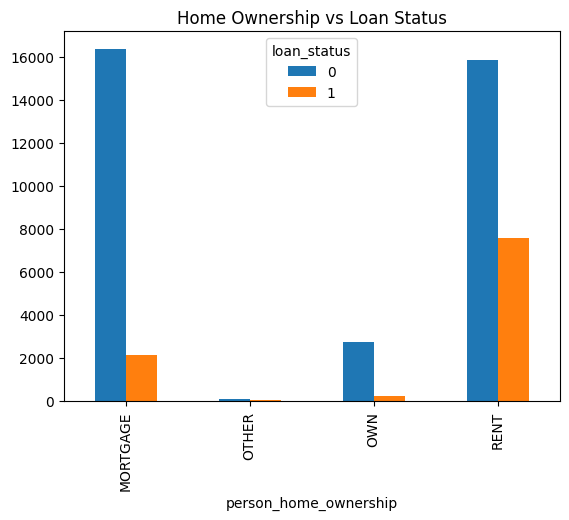

In [39]:
pd.crosstab(df["person_home_ownership"], df["loan_status"]).plot(kind="bar")
plt.title("Home Ownership vs Loan Status")
plt.show()


# Employment Experience vs Income

This scatter plot shows whether more work experience leads to higher income.


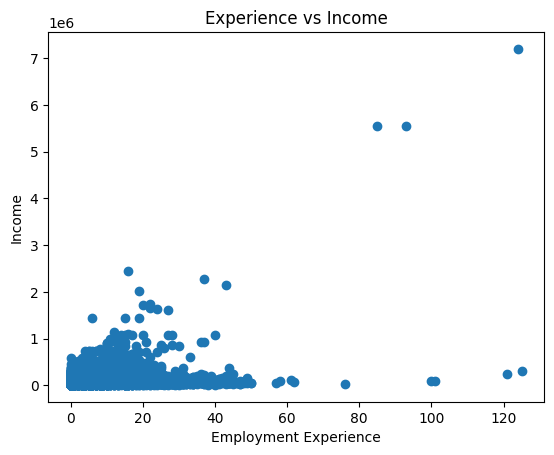

In [40]:
plt.scatter(df["person_emp_exp"], df["person_income"])
plt.xlabel("Employment Experience")
plt.ylabel("Income")
plt.title("Experience vs Income")
plt.show()


# Credit History Length Distribution

This histogram shows how long applicants have maintained credit history,
which is an important factor in creditworthiness.


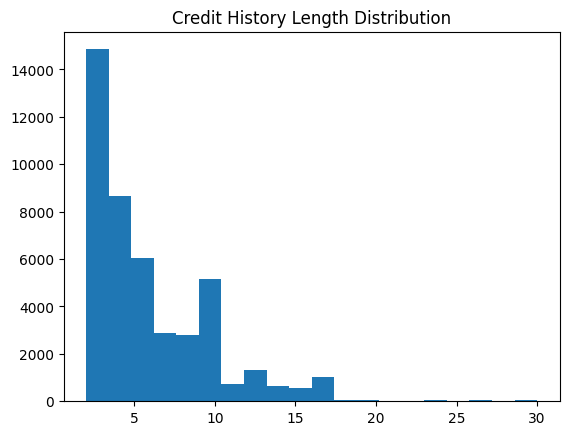

In [41]:
plt.hist(df["cb_person_cred_hist_length"], bins=20)
plt.title("Credit History Length Distribution")
plt.show()


# Loan Burden Analysis

This metric shows what percentage of a person's income
is represented by the loan amount.

Higher values indicate higher financial risk.


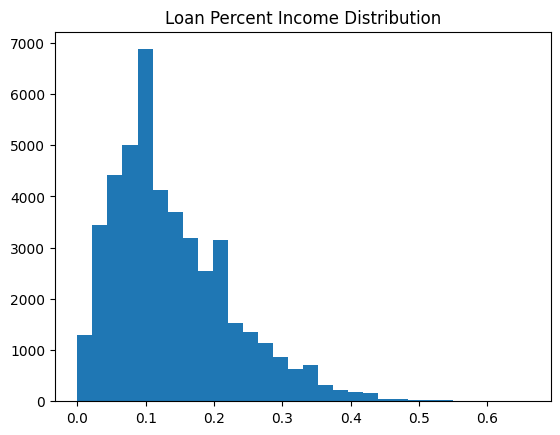

In [42]:
plt.hist(df["loan_percent_income"], bins=30)
plt.title("Loan Percent Income Distribution")
plt.show()


# Loan Approval Rate

This metric shows the percentage of approved loans in the dataset,
helping understand overall approval trends.


In [43]:
approval_rate = df["loan_status"].value_counts(normalize=True) * 100
approval_rate


loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

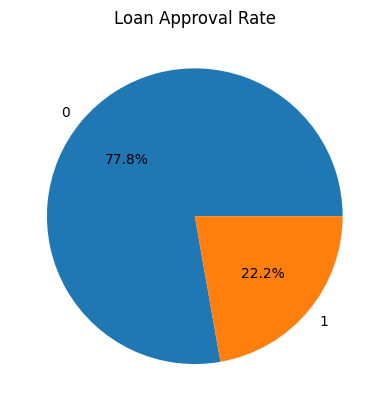

In [44]:
approval_rate.plot(kind="pie", autopct="%1.1f%%")
plt.title("Loan Approval Rate")
plt.ylabel("")
plt.show()


# Risk Profile by Credit Score

Applicants are grouped into credit score ranges to analyze
approval probability across risk levels.


In [45]:
bins = [300, 580, 670, 740, 850]
labels = ["Poor", "Fair", "Good", "Excellent"]

df["credit_group"] = pd.cut(df["credit_score"], bins=bins, labels=labels)

pd.crosstab(df["credit_group"], df["loan_status"])


loan_status,0,1
credit_group,,
Poor,5496,1578
Fair,20932,6060
Good,8502,2344
Excellent,70,18


# Gender Share

This pie chart shows the proportion of male and female applicants
in the dataset.

It helps understand the demographic distribution of loan applicants.


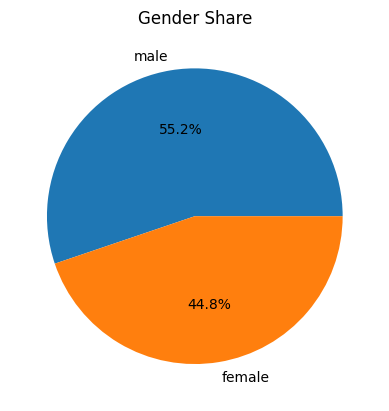

In [46]:
df["person_gender"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Gender Share")
plt.ylabel("")
plt.show()


# Education Level Distribution

This chart shows the proportion of applicants based on education level.
It helps analyze the educational background of borrowers.


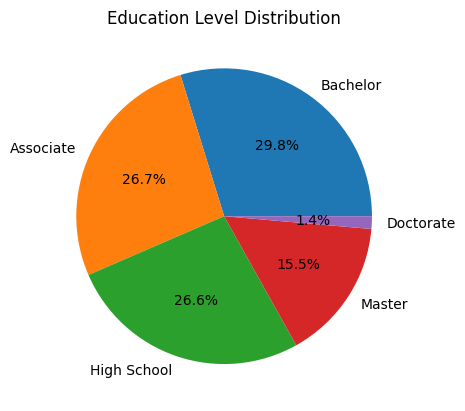

In [47]:
df["person_education"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Education Level Distribution")
plt.ylabel("")
plt.show()


# Loan Intent Share

This pie chart shows the proportion of loan purposes,
helping identify the most common reason for borrowing.


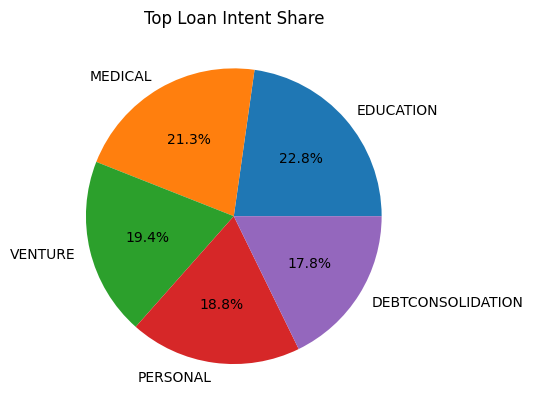

In [48]:
df["loan_intent"].value_counts().head(5).plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Top Loan Intent Share")
plt.ylabel("")
plt.show()


# Credit Score Group Distribution

This chart shows how applicants are distributed across credit score groups,
helping visualize risk segmentation.


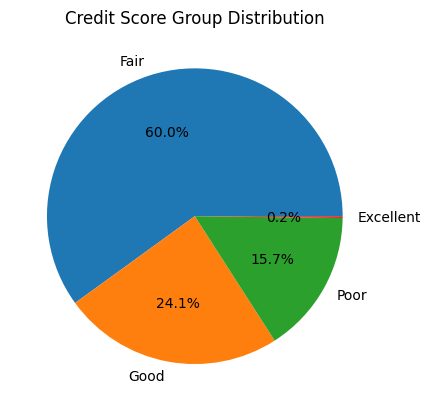

In [49]:
df["credit_group"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.title("Credit Score Group Distribution")
plt.ylabel("")
plt.show()


# Pie Chart Insights

Pie charts clearly show demographic and risk distributions.
They help quickly identify dominant groups such as gender share,
education levels, and credit risk segments.


# Conclusion

In this project, we performed comprehensive data cleaning and exploratory data analysis
on a loan dataset to understand applicant characteristics and loan approval patterns.

The dataset was first preprocessed by handling missing values, removing duplicates,
and correcting data types to ensure accuracy. After cleaning, various visualizations
and statistical analyses were conducted to uncover meaningful insights.

The analysis revealed that credit score, income level, previous loan defaults,
and loan burden (loan percentage of income) are key factors influencing loan approval.
Applicants with higher income and better credit history generally showed higher
approval rates, while previous defaults significantly reduced approval probability.

Overall, this project demonstrates how data preprocessing and exploratory analysis
can help identify risk patterns, understand customer profiles, and support better
decision-making in financial lending systems.
